# GreekStockPortfolio



### 5. Portfolio Allocation, Report & Benchmarking

---

In [ ]:
def top_in_cluster(df, cluster_column, criterion_column, n):
    """
    Extracts the top `n` elements from each cluster based on a specified criterion (final scoring).

    This function processes a DataFrame divided into clusters and selects the top `n` elements from each cluster,
    ranked according to the values in the `criterion_column` (which represents the final scoring). It first sorts
    the DataFrame by the `cluster_column`, then iterates through each cluster to identify and collect the top `n`
    entries based on the specified criterion.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing the data, with clustering information and criterion values.
    cluster_column (str): The name of the column used to identify different clusters.
    criterion_column (str): The name of the column used to rank the entries within each cluster (in this case, final scoring).
    n (int): The number of top entries to select from each cluster based on the criterion column.

    Returns:
    pd.DataFrame: A DataFrame containing the top `n` entries from each cluster, sorted by the criterion column.
    """

    # Sort the DataFrame by the cluster column to ensure clusters are processed sequentially
    df = df.sort_values(by=cluster_column)

    # Initialize an empty DataFrame to hold the top `n` elements from each cluster
    df_2 = pd.DataFrame()

    # Iterate over each unique cluster value
    for i in df[cluster_column].unique():
        # Select the rows corresponding to the current cluster and sort them by the criterion column in descending order
        cluster_df = df[df[cluster_column] == i].sort_values(by=criterion_column, ascending=False)
        # Take the top `n` rows from this cluster and concatenate them to the result DataFrame
        df_2 = pd.concat([df_2, cluster_df.head(n)])

    return df_2[criterion_column]


In [ ]:
def port_backtest_report(df, period, end=dt.datetime.now()):
    """
    Generates a backtest report for a portfolio over a specified period.

    This function retrieves historical stock data for a list of tickers, calculates daily logarithmic returns,
    and uses these returns to evaluate portfolio performance. It integrates with the `rp.jupyter_report` function
    to generate a performance report and then calculates the portfolio returns based on the provided weights.

    Parameters:
    df (pd.DataFrame): A DataFrame containing portfolio weights, where the index represents stock tickers
                       and the values represent the corresponding weights.
    period (int): The number of years over which to backtest the portfolio.
    end (datetime, optional): The end date for the historical data. Defaults to the current date.

    Returns:
    pd.Series: A pandas Series containing the portfolio returns over the specified period.
    """

    # Extract stock tickers from the DataFrame index
    stocks = df.index.to_list()

    # Calculate the start date for the historical data based on the end date and the number of years
    start = end - dt.timedelta(days=366 * period)  # Accounts for leap years with 366 days

    # Download historical stock data for the specified period
    historical = yf.download(stocks, start=start, end=end)

    # Focus on the 'Close' prices from the historical data
    historical = historical['Close']

    # Ensure the historical data is sorted by date in ascending order
    historical = historical.sort_index()

    # Interpolate missing values in the historical data using linear interpolation
    historical = historical.interpolate(method='linear', axis=0)

    # Calculate the daily log returns of the stocks
    log_returns = np.log(historical / historical.shift(1))

    # Drop the first row, which contains NaN due to the shift operation in log return calculation
    log_returns = log_returns.drop(log_returns.index[0])

    # Generate a performance report using the jupyter_report function
    ax = rp.jupyter_report(log_returns, df, rm='MV', t_factor=365, days_per_year=365)

    # Calculate portfolio returns by multiplying log returns by portfolio weights and summing across stocks
    port_returns = log_returns * df.T.values
    port_returns = port_returns.sum(axis=1)

    return port_returns


In [ ]:
def benchmarking(port_ret, benchmark_ticker, period, end=dt.datetime.now()):
    """
    Compares portfolio returns against a benchmark index over a specified period.

    This function retrieves historical stock data for a benchmark index, calculates daily logarithmic returns,
    and compares these returns to the provided portfolio returns. It generates performance plots and metrics
    to evaluate how the portfolio performs relative to the benchmark.

    Parameters:
    port_ret (pd.Series): A pandas Series containing portfolio returns.
    benchmark_ticker (str): The ticker symbol of the benchmark index.
    period (int): The number of years over which to compare the portfolio returns.
    end (datetime, optional): The end date for the historical data. Defaults to the current date.

    Returns:
    None: The function generates performance plots and metrics but does not return any values.
    """
    # Download historical stock data for the specified period
    start = end - dt.timedelta(days=366 * period)
    historical = yf.download(benchmark_ticker, start=start, end=end)
    historical = historical['Close']
    historical = historical.sort_index()
    historical = historical.interpolate(method='linear', axis=0)
    log_returns = np.log(historical / historical.shift(1))
    log_returns = log_returns.drop(log_returns.index[0])

    # Define the plot title
    title = 'Portfolio vs Benchmark (' + benchmark_ticker + ')'

    # Extend pandas functionalities for quantstats
    qs.extend_pandas()

    # Generate performance plots comparing portfolio returns to benchmark returns
    qs.reports.plots(port_ret, log_returns, title=title, show=True, mode='full')

    # Generate performance metrics comparing portfolio returns to benchmark returns
    qs.reports.metrics(port_ret, benchmark=log_returns, mode='full')


In [ ]:
# Retrieve the top 3 stocks from each cluster based on the 'Score' column
# 'Cluster' is used to group the data, and 'Score' is the criterion used for ranking
w = top_in_cluster(final_stocks_cluster_score, 'Cluster', 'Score', 3)

# Normalize the weights by dividing each value by the sum of all weights
# This ensures that the sum of the weights is equal to 1
w = w / w.sum()

# Output the normalized weights
w


,Score
Ticker,
TENERGY.AT,0.110147
HTO.AT,0.094247
KRI.AT,0.077479
PPC.AT,0.090489
EUROB.AT,0.090199
INKAT.AT,0.089621
INLOT.AT,0.078346
PREMIA.AT,0.069673
LAVI.AT,0.038450


[*********************100%%**********************]  12 of 12 completed


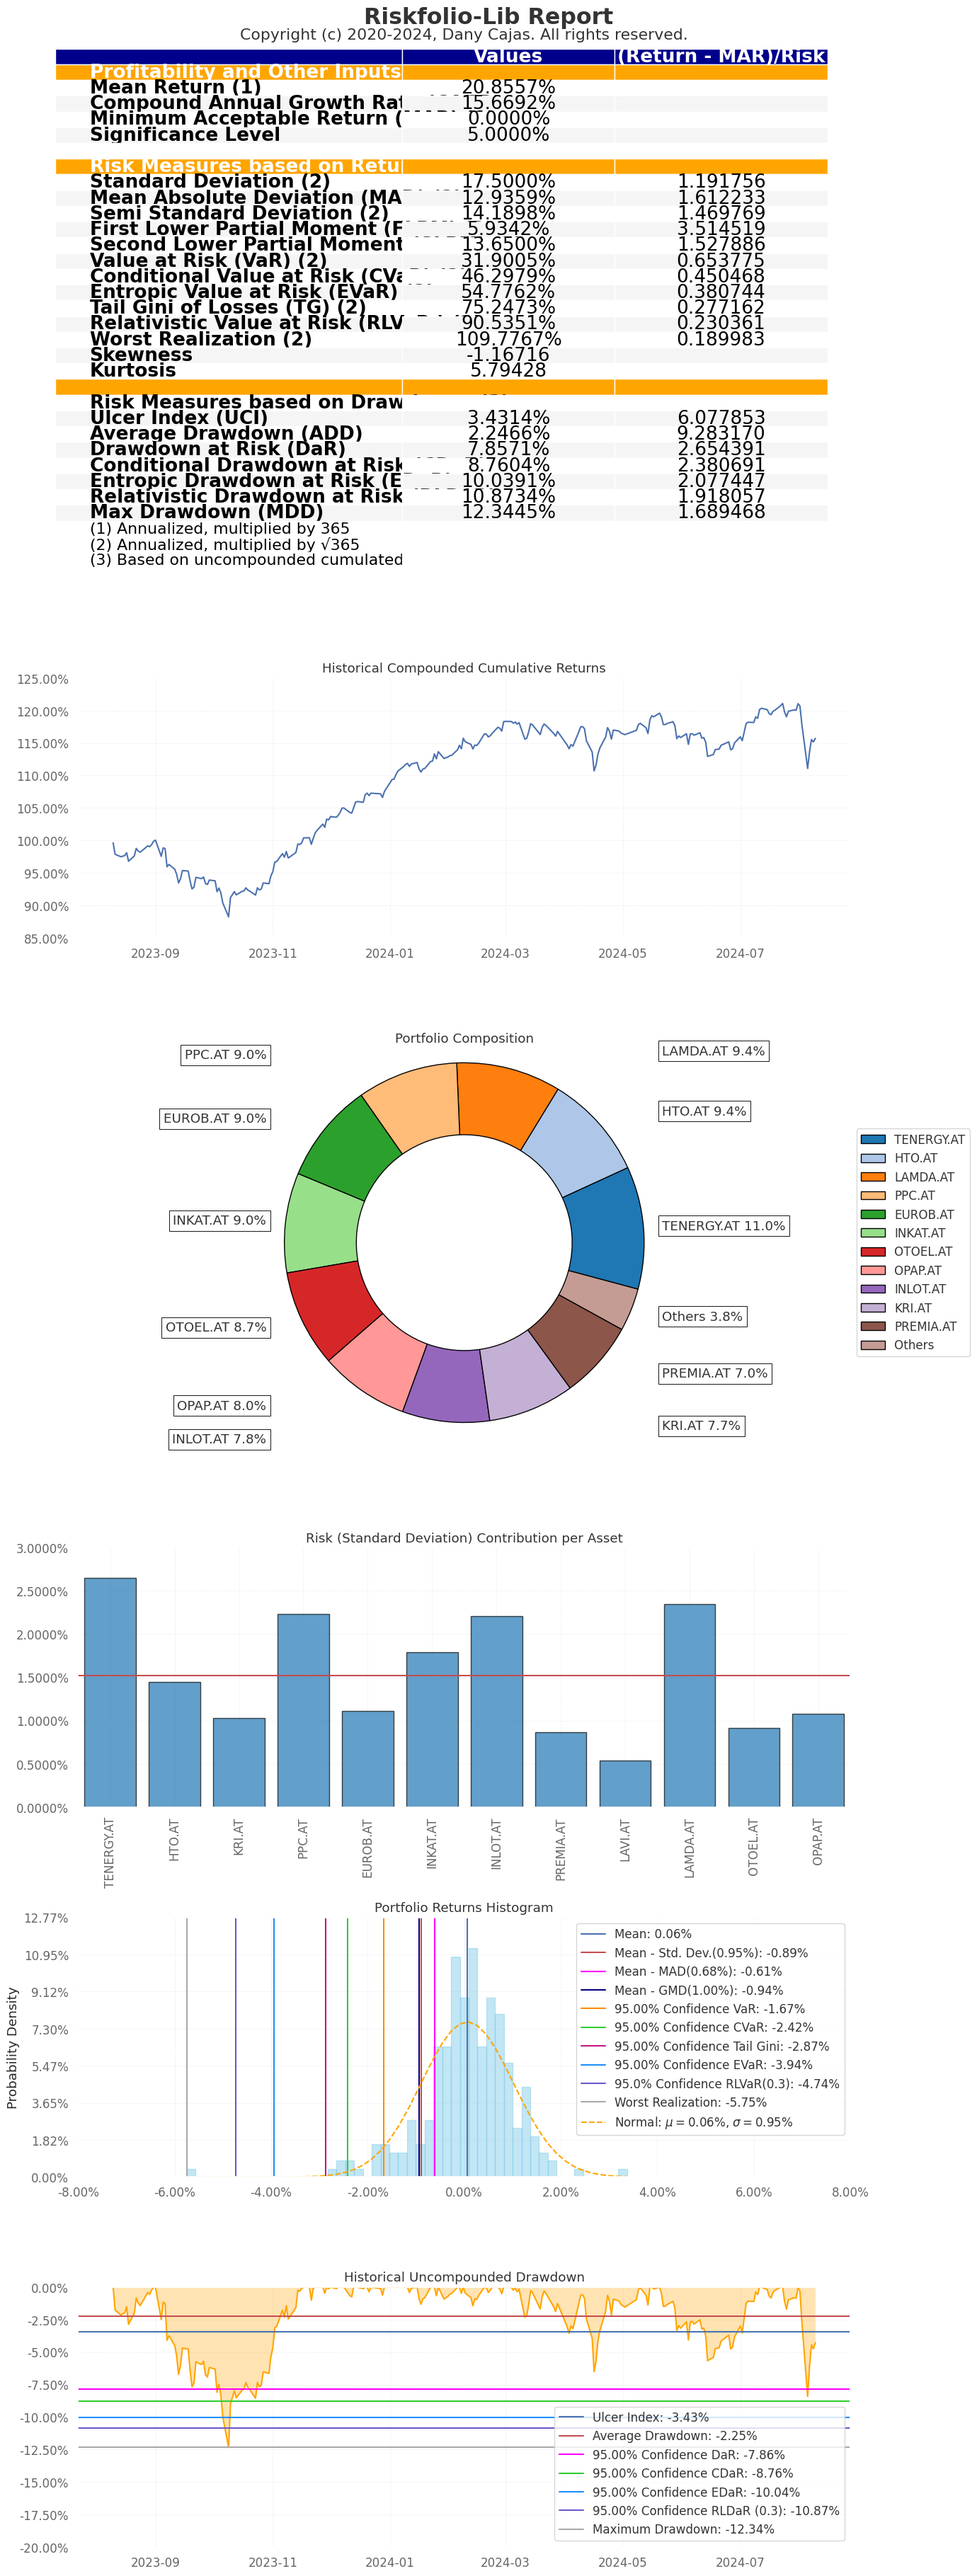

In [ ]:
# Calculate the portfolio returns for the last 1 year and crete a portfolio report
port_returns = port_backtest_report(w, 1)

[*********************100%%**********************]  1 of 1 completed


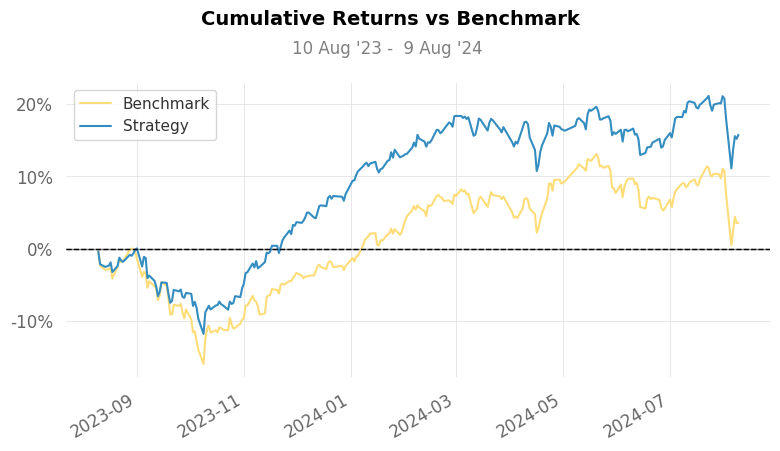

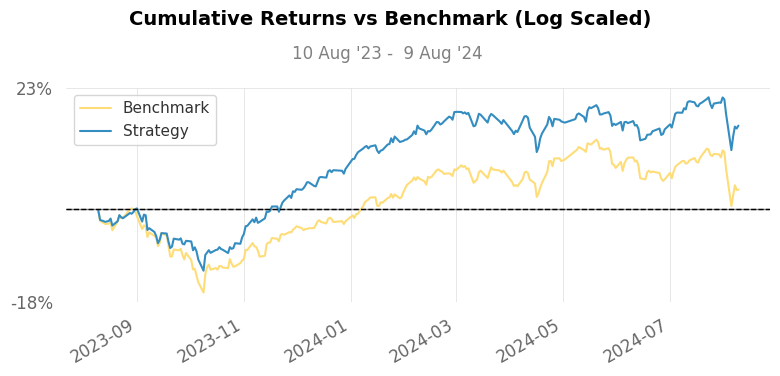

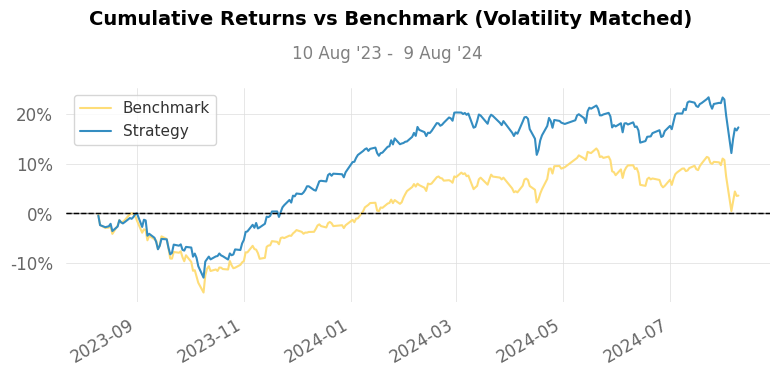

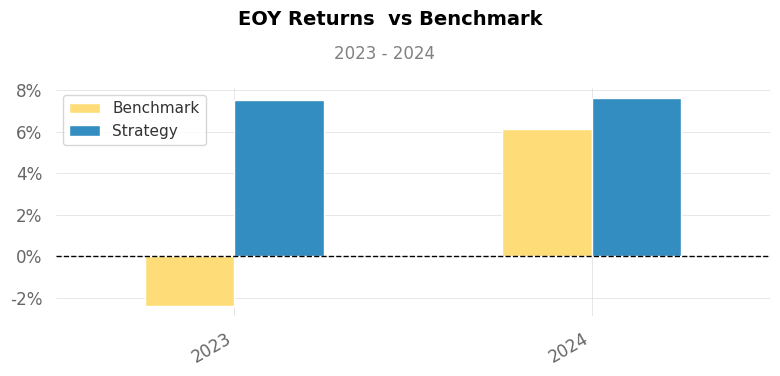

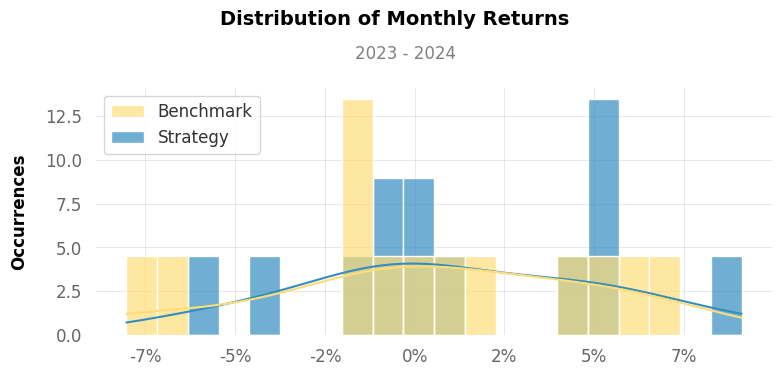

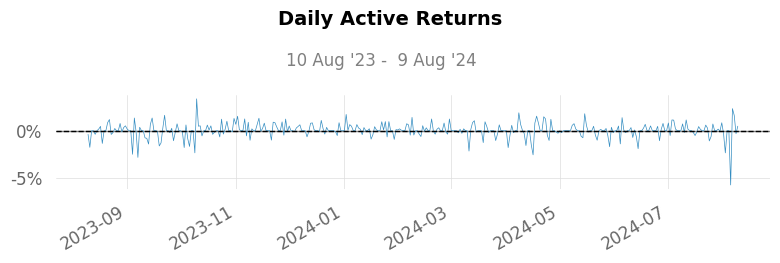

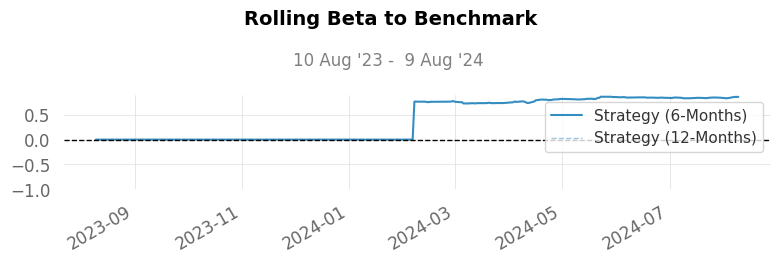

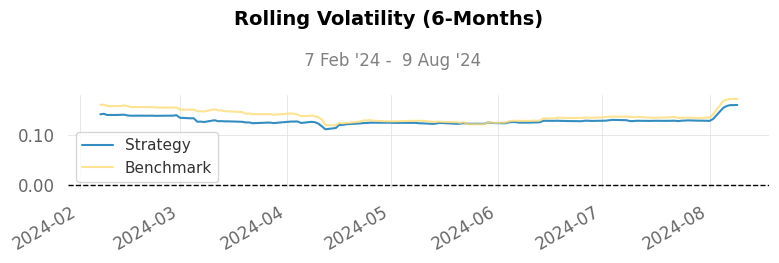

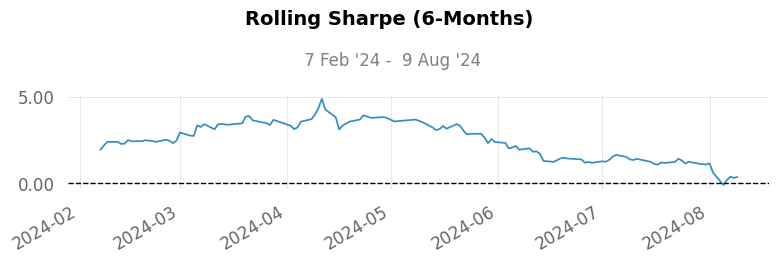

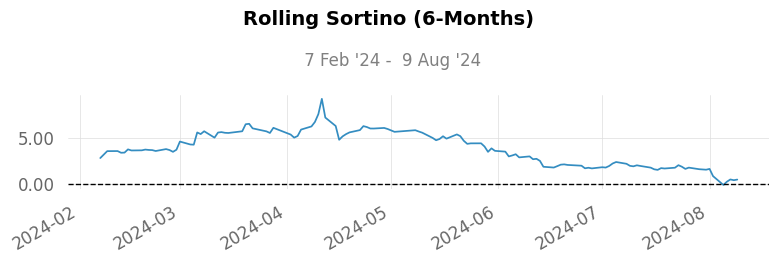

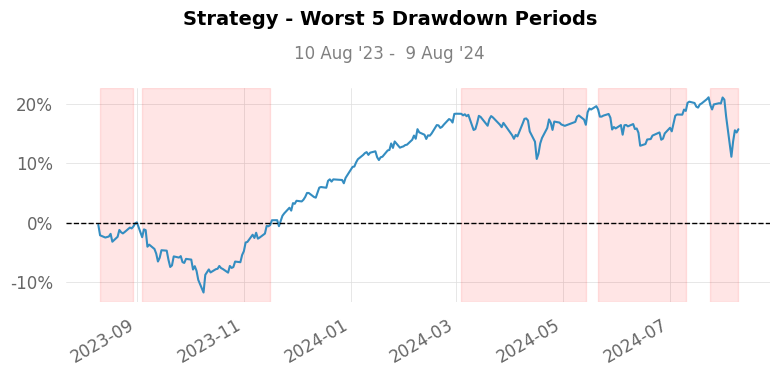

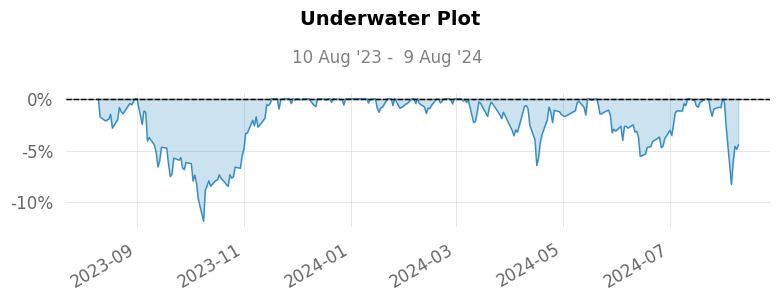

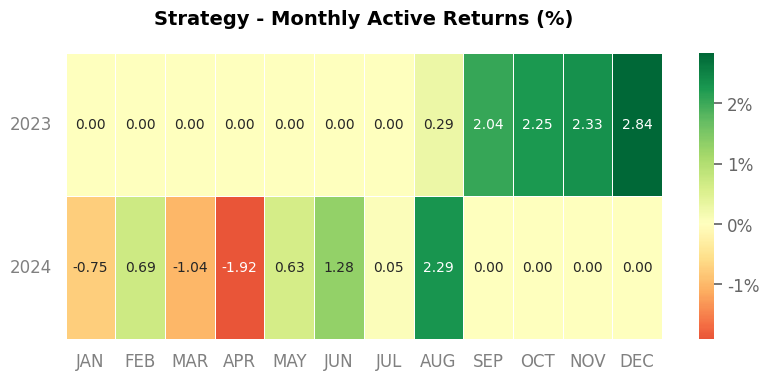

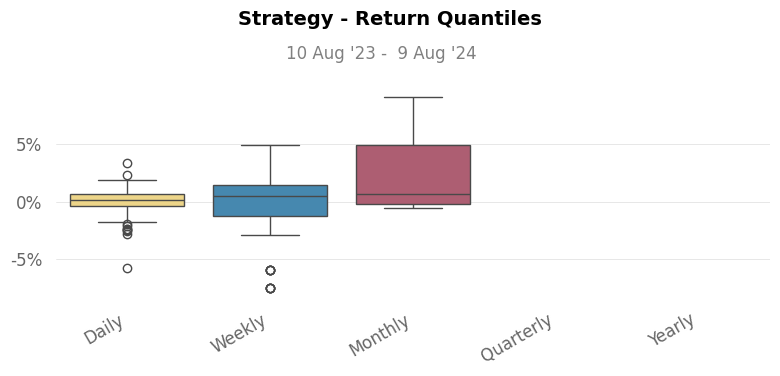

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2023-08-10   2023-08-10
End Period                 2024-08-09   2024-08-09
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          3.58%        15.72%
CAGR﹪                     2.46%        10.6%

Sharpe                     0.3          1.05
Prob. Sharpe Ratio         61.49%       84.2%
Smart Sharpe               0.29         1.03
Sortino                    0.4          1.41
Smart Sortino              0.39         1.37
Sortino/√2                 0.28         0.99
Smart Sortino/√2           0.27         0.97
Omega                      1.2          1.2

Max Drawdown               -15.93%      -11.81%
Longest DD Days            129          74
Volatility (ann.)          16.69%       15.14%
R^2                        0.81         0.81
Information Ratio          0.09         0.09
Calmar                 

In [ ]:
# Benchmark the portfolio's performance against the GD.AT index (General Index of the Greek Stock Exchange) over a 1-year period.
benchmarking(port_returns,'GD.AT',1)